In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"mfajarzamzami","key":"55dca05f3406fadfede575d85f9674e3"}'}

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!ls ~/.kaggle

kaggle.json


In [ ]:
!kaggle datasets download -d juledz/heart-attack-prediction

Dataset URL: https://www.kaggle.com/datasets/juledz/heart-attack-prediction
License(s): apache-2.0
heart-attack-prediction.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
!mkdir heart-dataset
!unzip heart-attack-prediction.zip -d heart
!ls heart

mkdir: cannot create directory ‘heart-dataset’: File exists
Archive:  heart-attack-prediction.zip
  inflating: heart/heart.csv         
heart.csv


In [68]:
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import pandas as pd

In [140]:
df = pd.read_csv(r'/content/heart/heart.csv')

In [141]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0.23
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0.37
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0.24
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0.28
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0.21


In [142]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.536390
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.285822
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.100000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.260000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,0.710000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,0.810000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,0.900000


In [143]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   float64
dtypes: float64(2), int64(12)
memory usage: 112.2 KB


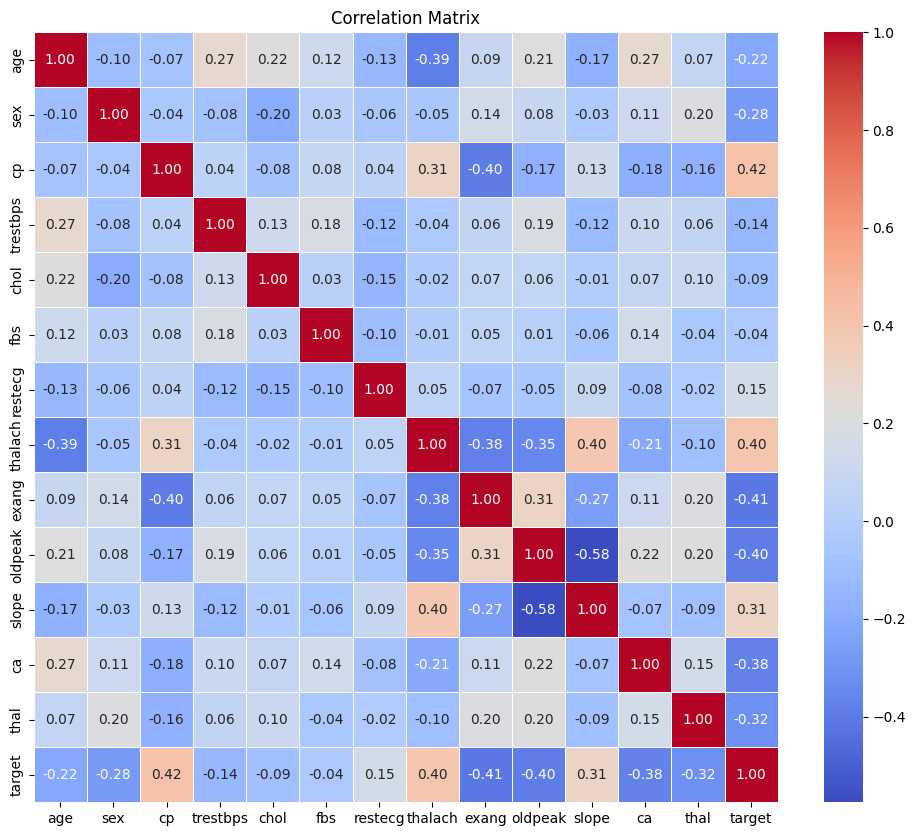

In [144]:
correlation_matrix = df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

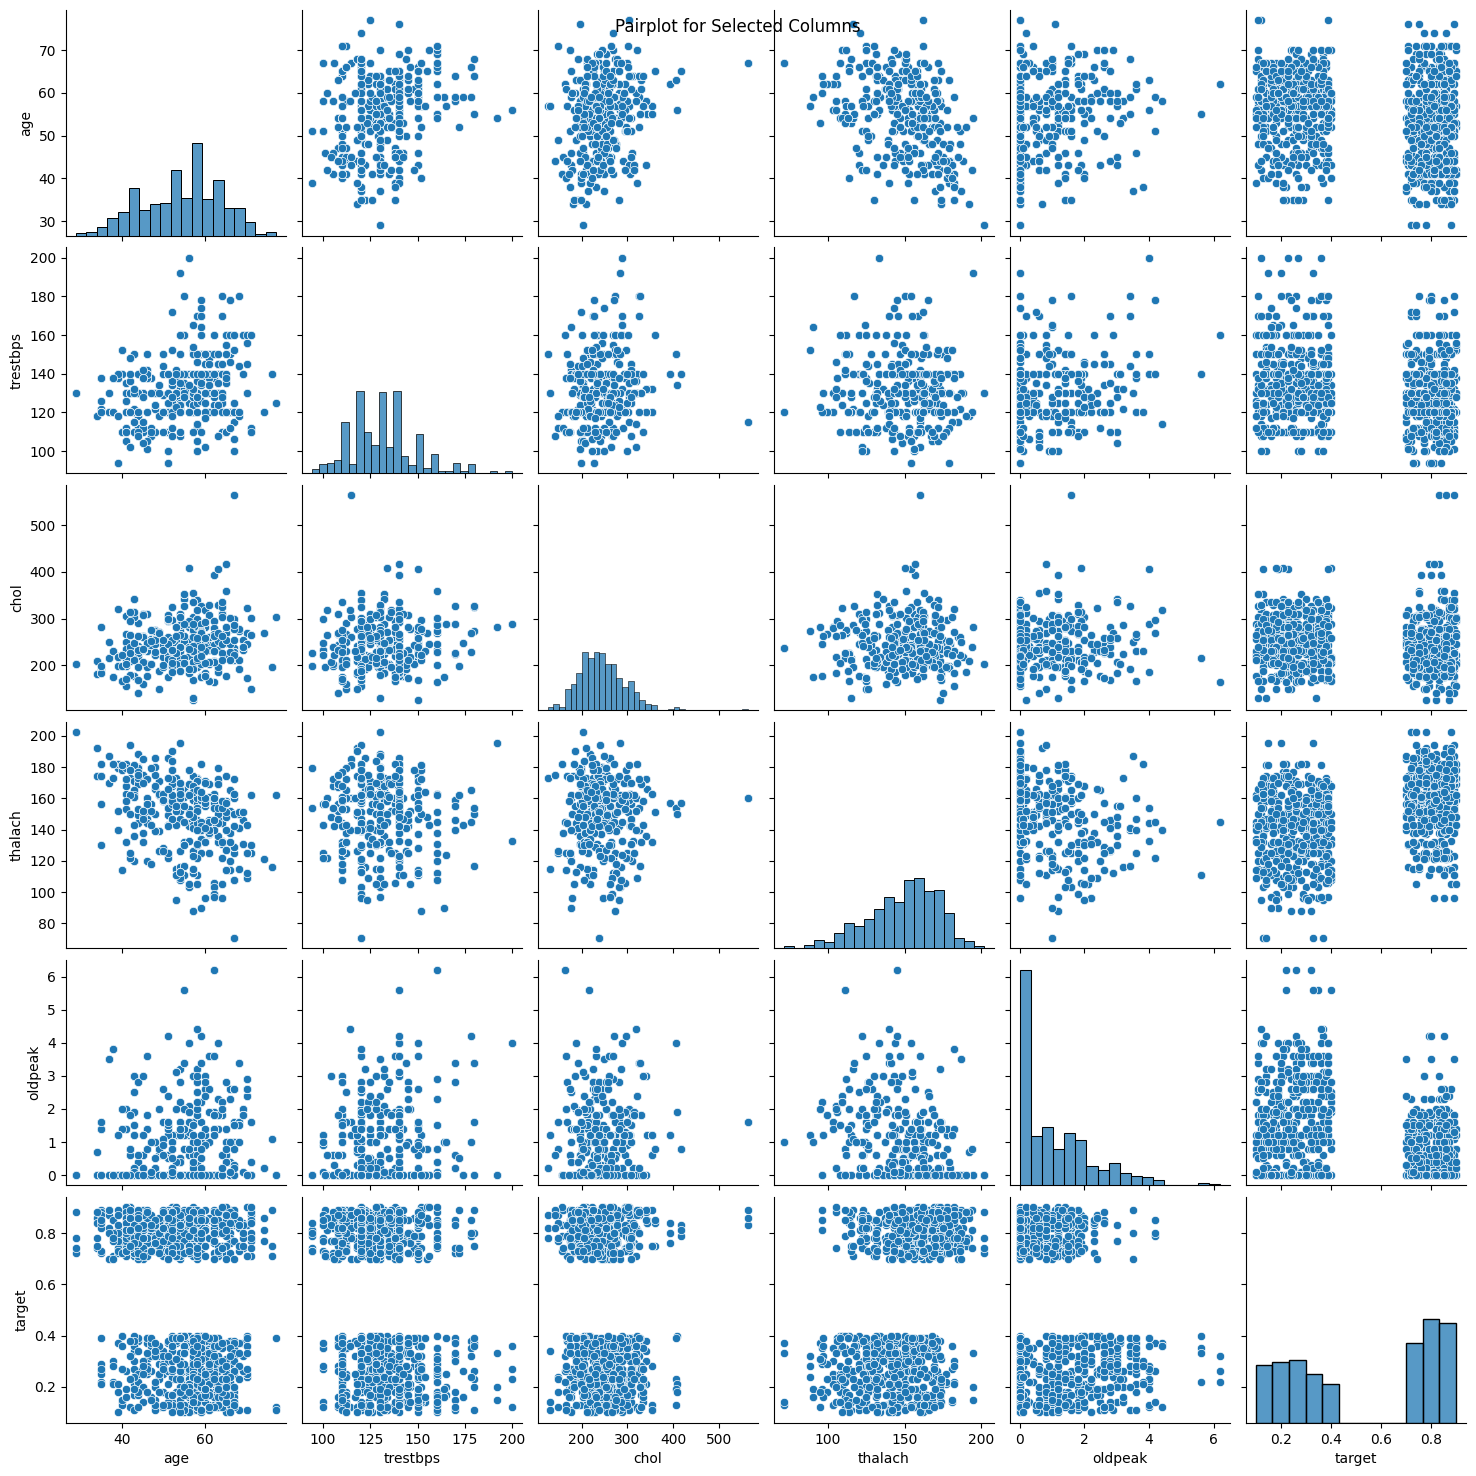

In [145]:
sns.pairplot(df[['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'target']])
plt.suptitle('Pairplot for Selected Columns')
plt.show()

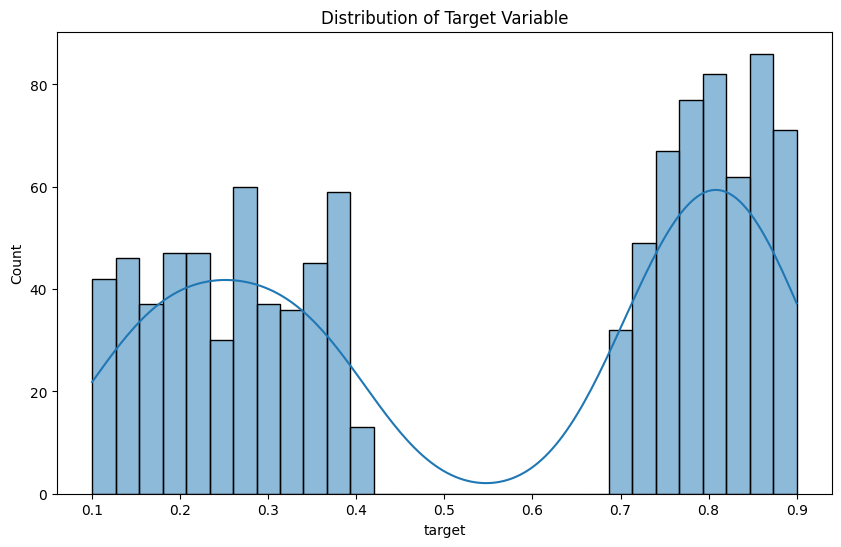

In [146]:
plt.figure(figsize=(10, 6))
sns.histplot(df['target'], bins=30, kde=True)
plt.title('Distribution of Target Variable')
plt.show()

<Axes: >

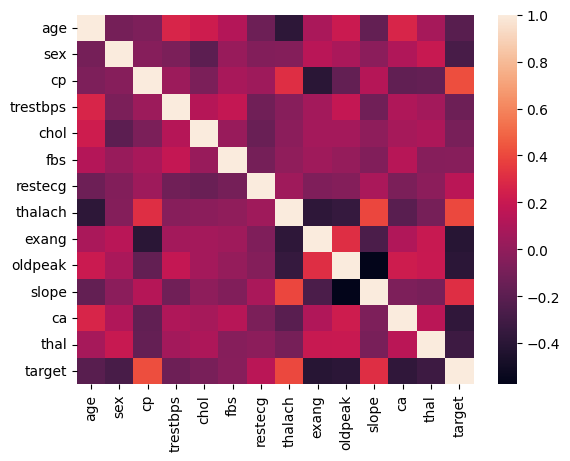

In [147]:
sns.heatmap(df.corr())

<Axes: xlabel='target', ylabel='count'>

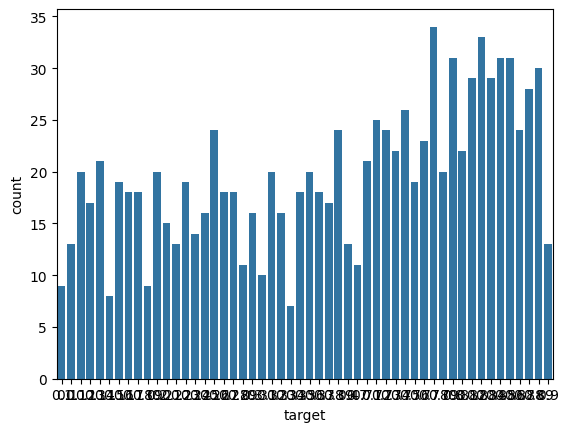

In [148]:
sns.countplot(x='target',data=df)

In [149]:
X = df.drop('target', axis=1)
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [150]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1)
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [151]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_9 (Dense)                 │ (None, 64)             │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,009 (11.75 KB)

 Trainable params: 3,009 (11.75 KB)

 Non-trainable params: 0 (0.00 B)

In [152]:
model.compile(optimizer='adam', loss='mean_squared_error')
history = model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=2)

Epoch 1/50
21/21 - 1s - 61ms/step - loss: 0.2466 - val_loss: 0.1658
Epoch 2/50
21/21 - 0s - 6ms/step - loss: 0.0863 - val_loss: 0.1000
Epoch 3/50
21/21 - 0s - 6ms/step - loss: 0.0573 - val_loss: 0.0752
Epoch 4/50
21/21 - 0s - 6ms/step - loss: 0.0465 - val_loss: 0.0648
Epoch 5/50
21/21 - 0s - 6ms/step - loss: 0.0393 - val_loss: 0.0595
Epoch 6/50
21/21 - 0s - 8ms/step - loss: 0.0341 - val_loss: 0.0544
Epoch 7/50
21/21 - 0s - 12ms/step - loss: 0.0304 - val_loss: 0.0520
Epoch 8/50
21/21 - 0s - 7ms/step - loss: 0.0270 - val_loss: 0.0483
Epoch 9/50
21/21 - 0s - 8ms/step - loss: 0.0247 - val_loss: 0.0464
Epoch 10/50
21/21 - 0s - 13ms/step - loss: 0.0235 - val_loss: 0.0440
Epoch 11/50
21/21 - 0s - 7ms/step - loss: 0.0212 - val_loss: 0.0430
Epoch 12/50
21/21 - 0s - 8ms/step - loss: 0.0199 - val_loss: 0.0405
Epoch 13/50
21/21 - 0s - 6ms/step - loss: 0.0188 - val_loss: 0.0388
Epoch 14/50
21/21 - 0s - 7ms/step - loss: 0.0176 - val_loss: 0.0380
Epoch 15/50
21/21 - 0s - 8ms/step - loss: 0.0167 - val

In [153]:
y_pred = model.predict(X_test_scaled).flatten()


mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
Mean Squared Error: 0.022260980724533943
R-squared: 0.717303560684291


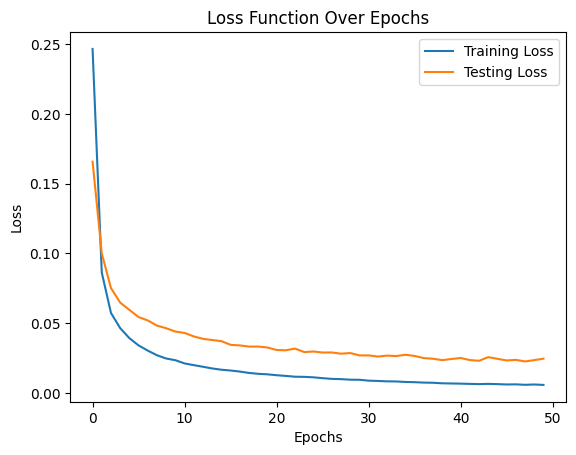

In [154]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Testing Loss')
plt.title('Loss Function Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [159]:
new_data = pd.DataFrame(data=[[45, 7, 3, 120, 200, 0, 1, 160, 0, 1.5, 2, 0, 3]], columns=X.columns)


new_data_scaled = scaler.transform(new_data)

predicted_risk = model.predict(new_data_scaled).flatten()[0]


predicted_risk_percentage = round(predicted_risk * 100, 2)
print(f'Predicted Risk of Heart Disease: {predicted_risk_percentage}%')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
Predicted Risk of Heart Disease: 89.95999908447266%


In [160]:
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [161]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import pickle

filename = "heart.sav"
pickle.dump(lr,open(filename,'wb'))